<h1>BOSTON TASK 1 REV 1 - MATTINSON</h1>

<div style="text-align: center; 
    line-height: 48px;
    font-size: 24px; " >  
    Boston Housing Linear Regression<br>
    Mike Mattinson<br>
    Master of Science, Data Analytics, WGU.edu<br>
    Task 1 - Linear Regression<br>
    September 12, 2021<br>
</div>

<div style="font-family:Impact;">Configure Notebook.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Import and configure packages. All of the code for importing and configuring is contained in a .PY file. Also, there is a second Helpers.PY file to define a few functions.</span></div>

In [2]:
# custom imports and helper functions
from boston_imports import *
%matplotlib inline
warnings.filterwarnings('ignore')

P:\code\wgu\py39\Scripts\python.exe
python version: 3.9.7
pandas version: 1.3.0
numpy version: 1.19.5
scipy version: 1.7.1
sklearn version: 1.0.1
matplotlib version: 3.4.2
seaborn version: 0.11.2
graphviz version: 0.17


In [3]:
from boston_helpers import getFilename
from boston_helpers import saveTable
from boston_helpers import saveFigure

## Ask the Right Questions

Predict Boston Housing median value (MEDV) from available data (CRIM, ZN, INDUS, etc). 

## Data Collection

Here is a description of the data:

## Obtain Data

http://lib.stat.cmu.edu/datasets/boston

## Configure Notebook

In [1]:
# show python environment variables
import sys
print(sys.version)
print(sys.executable)

3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
P:\code\wgu\py39\Scripts\python.exe


## Scrub Data (SD)

### Raw Data

Now, to load this kind of file to dataframe with pandas.read_csv() pass ‘\s+’ as separator. Here \s+ means any one or more white space character.

In [5]:
# read csv file - use URL not the data\boston.txt file...
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
type(raw_df)
display(raw_df.head(20))

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
5,392.83000,4.03,34.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.03237,0.00,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
7,394.63000,2.94,33.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.06905,0.00,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
9,396.90000,5.33,36.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# each data consists of two rows
# all of the data on first row
# plus the first two data on second row
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

In [7]:
type(data)

numpy.ndarray

In [8]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
# target data is the third data on second row
target = raw_df.values[1::2, 2]

In [10]:
type(target)

numpy.ndarray

In [11]:
# feature data - convert ndarray to dataframe
X = pd.DataFrame(data, columns=['CRIM',
                                'ZN',
                                'INDUS',
                                'CHAS',
                                'NOX',
                                'RM',
                                'AGE',
                                'DIS',
                                'RAD',
                                'TAX',
                                'PTRATIO',
                                'B',
                                'LSAT'])

In [12]:
# target data
y = pd.DataFrame(target, columns=['MEDV'])

In [13]:
# if you want the whole data set, use y.merge(X)
rawData = X.merge(y, left_index=True, right_index=True)

In [14]:
type(rawData)

pandas.core.frame.DataFrame

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 4-1.<span style="font-weight: normal;">RAW DATA</span></div>

In [15]:
# raw data
d =rawData
f = getFilename('RAW', sect='SD',
       subfolder='tables', caption='4 1', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d.head().T)
print('Table saved to: {}'.format(f))

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


Table saved to: TABLES/BOSTON_TASK1_SD_TAB_4_1_RAW.CSV


### Clean Data

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 4-2.<span style="font-weight: normal;">CLEAN DATA</span></div>

In [16]:
# clean data
cleanData = X.merge(y, left_index=True, right_index=True)
d =cleanData
f = getFilename('CLEAN', sect='SD',
       subfolder='tables', caption='4 2', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d.head().T)
print('Table saved to: {}'.format(f))

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


Table saved to: TABLES/BOSTON_TASK1_SD_TAB_4_2_CLEAN.CSV


### Training Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 4-3.<span style="font-weight: normal;">TRAINING DATA</span></div>

In [18]:
# training data
trainData = X_train.merge(y_train, left_index=True, right_index=True)
d =trainData
f = getFilename('TRAIN', sect='SD',
       subfolder='tables', caption='4 2', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d.head().T)
print('Table saved to: {}'.format(f))

,475,489,298,100,223
CRIM,6.39312,0.18337,0.06466,0.14866,0.6147
ZN,0.00000,0.00000,70.00000,0.00000,0.0000
INDUS,18.10000,27.74000,2.24000,8.56000,6.2000
CHAS,0.00000,0.00000,0.00000,0.00000,0.0000
NOX,0.58400,0.60900,0.40000,0.52000,0.5070
RM,6.16200,5.41400,6.34500,6.72700,6.6180
AGE,97.40000,98.30000,20.10000,79.90000,80.8000
DIS,2.20600,1.75540,7.82780,2.77780,3.2721
RAD,24.00000,4.00000,5.00000,5.00000,8.0000
TAX,666.00000,711.00000,358.00000,384.00000,307.0000


Table saved to: TABLES/BOSTON_TASK1_SD_TAB_4_2_TRAIN.CSV


### Testing Data

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 4-4.<span style="font-weight: normal;">TEST DATA</span></div>

In [19]:
# test data
testData = X_test.merge(y_test, left_index=True, right_index=True)
d =trainData
f = getFilename('TEST', sect='SD',
       subfolder='tables', caption='4 2', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d.head().T)
print('Table saved to: {}'.format(f))

,475,489,298,100,223
CRIM,6.39312,0.18337,0.06466,0.14866,0.6147
ZN,0.00000,0.00000,70.00000,0.00000,0.0000
INDUS,18.10000,27.74000,2.24000,8.56000,6.2000
CHAS,0.00000,0.00000,0.00000,0.00000,0.0000
NOX,0.58400,0.60900,0.40000,0.52000,0.5070
RM,6.16200,5.41400,6.34500,6.72700,6.6180
AGE,97.40000,98.30000,20.10000,79.90000,80.8000
DIS,2.20600,1.75540,7.82780,2.77780,3.2721
RAD,24.00000,4.00000,5.00000,5.00000,8.0000
TAX,666.00000,711.00000,358.00000,384.00000,307.0000


Table saved to: TABLES/BOSTON_TASK1_SD_TAB_4_2_TEST.CSV


## Explore Data (ED)

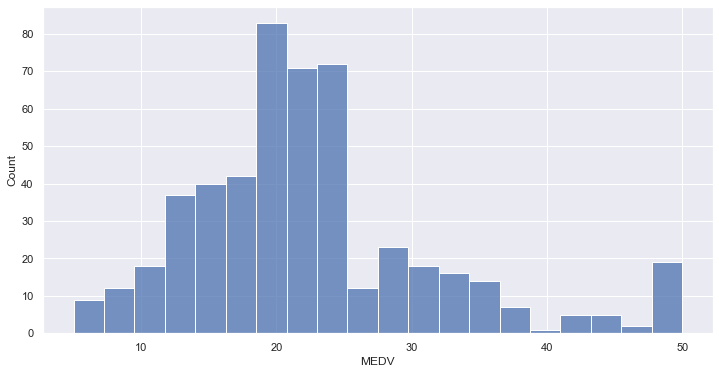

In [20]:
plt.figure(figsize=(12,6))
sns.set('notebook')
#sns.distplot(rawData.MEDV,bins=20)
sns.histplot(rawData.MEDV, bins=20)
#sns.displot(rawData.MEDV, bins=20)
plt.show()

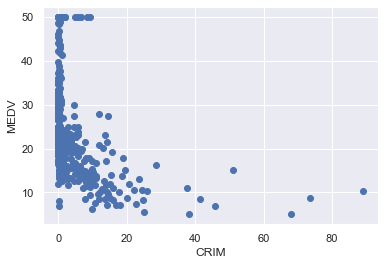

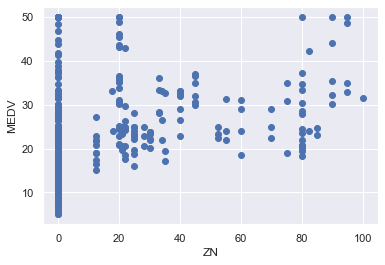

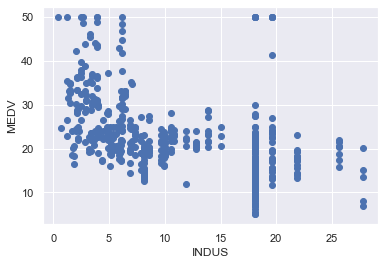

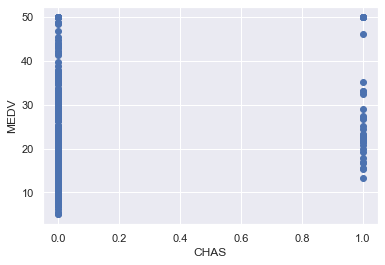

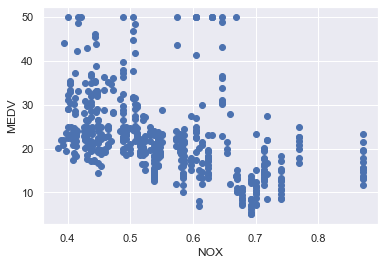

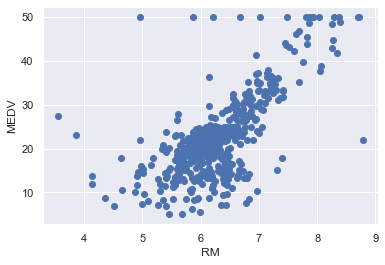

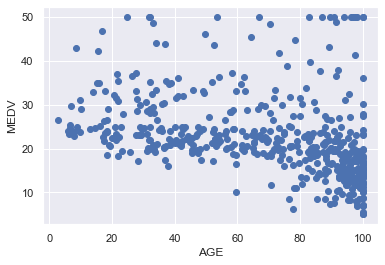

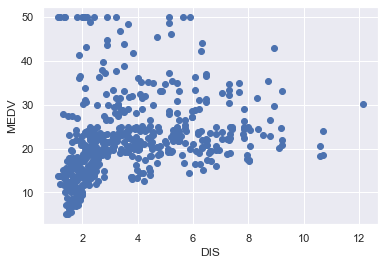

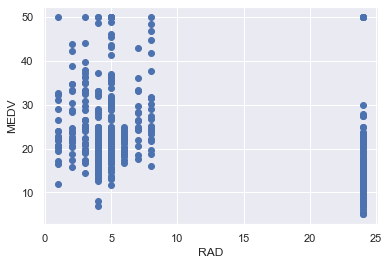

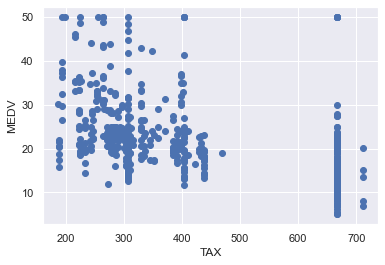

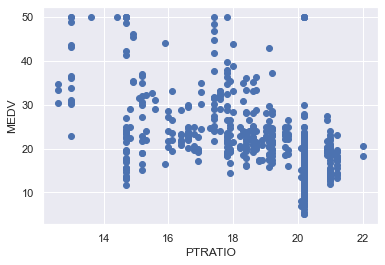

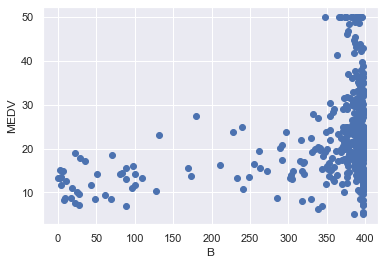

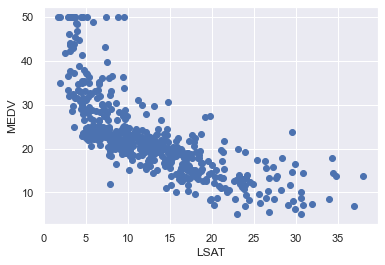

In [21]:
for i in X.columns:  #plotting each features with respect to target
    plt.scatter(X[i],y)
    plt.xlabel(i)
    plt.ylabel("MEDV")
    plt.show()

## Model Data (MD)

### Initial Model

In [22]:
# initial model
y = df.loc[ : , df.columns == 'target']
X = df.loc[ : , df.columns != 'target']
Xc = sm.add_constant(X)
model_1 = sm.OLS(y, Xc).fit()
print(model_1.summary2()) # using alternate summary layout

NameError: name 'df' is not defined

In [ ]:
# create correlation matrix
custom_corr_matrix(X,'Model_1')

In [ ]:
# automatically drop cols if p > 0.05
equation = model_1.summary2().tables[1]
for i in equation.itertuples():
    #print(i[0], i[1], i[2], i[3], i[4])
    if i[4] > 0.05:
        # drop col
        X.drop(columns = [i[0]], inplace = True)

# also drop Bandwidth_GB_Year due to high multicollinearity with Tenure
X.drop(columns = ['TAX'], inplace = True)
print(X.columns)

In [ ]:
# updated model 
# y is already defined
# X is already defined and reduced
Xc = sm.add_constant(X) # reset 
model_2 = sm.OLS(y, Xc).fit()
print(model_2.summary2()) # using alternate summary layout

In [ ]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_2.summary2().tables[0][3][0]))
equation = model_2.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_2.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

In [ ]:
# create correlation matrix
custom_corr_matrix(X,'Model_2')

In [ ]:
# automatically drop cols if p > 0.05
equation = model_2.summary2().tables[1]
for i in equation.itertuples():
    #print(i[0], i[1], i[2], i[3], i[4])
    if i[4] > 0.05:
        # drop col
        X.drop(columns = [i[0]], inplace = True)

# also drop Bandwidth_GB_Year due to high multicollinearity with Tenure
X.drop(columns = ['DIS'], inplace = True)
print(X.columns)

In [ ]:
# final model 
# y is already defined
# X is already defined and reduced
Xc = sm.add_constant(X) # reset 
model_3 = sm.OLS(y, Xc).fit()
print(model_3.summary2()) # using alternate summary layout

In [ ]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_3.summary2().tables[0][3][0]))
equation = model_3.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_3.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

## Interpret Data (ID)

## Web Sources

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980. (51256 bytes)

http://lib.stat.cmu.edu/datasets/  This is a copy of UCI ML housing dataset. https://archive.ics.uci.edu/ml/machine-learning-databases/housing 
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

https://thispointer.com/pandas-read-csv-file-to-dataframe-with-custom-delimiter-in-python/

## Other Sources

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://www.kaggle.com/henriqueyamahata/boston-housing-with-linear-regression

https://ai.plainenglish.io/linear-regression-using-boston-housing-dataset-e4c2ee891b02

https://amitg0161.medium.com/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann

Belsley, Kuh & Welsch, ‘Regression diagnostics: Identifying Influential Data and Sources of Collinearity’, Wiley, 1980. 244-261